# Graph Neural Network

### Loading the files

In [17]:
import pandas as pd
nodes_df = pd.read_csv('Raw Dataset/Homogenoeus/Nodes/Nodes.csv')
nodes_types_group_subgroup_df = pd.read_csv('Raw Dataset/Homogenoeus/Nodes/Node Types (Product Group and Subgroup).csv')
nodes_types_plant_storage_df = pd.read_csv('Raw Dataset/Homogenoeus/Nodes/Nodes Type (Plant & Storage).csv')
nodes_index_df = pd.read_csv('Raw Dataset/Homogenoeus/Nodes/NodesIndex.csv')

In [18]:
nodes_df.head()

,Node
0,SOS008L02P
1,SOS005L04P
2,SOS003L04P
3,SOS002L09P
4,SOS001L12P


## 1. Creating the graph object

We need to convert our data in the format of several csv files into a graph structure in order to apply GNNs.

In [19]:
import networkx as nx
import torch
from torch_geometric.utils import from_networkx

In [98]:
G = nx.Graph()

## Nodes
# Products
for index, row in nodes_index_df.iterrows():
    G.add_node(row['NodeIndex'], name=row['NodeIndex'])
# Groups
for g in nodes_types_group_subgroup_df['Group'].unique():
    G.add_node(g, name=g, )
# Subgroups
for sg in nodes_types_group_subgroup_df['Sub-Group'].unique():
    G.add_node(sg, name=sg)


## Edges
# Groups - Subgroups
for index, row in nodes_types_group_subgroup_df.iterrows():
    G.add_edge(row['Group'], row['Sub-Group'])
# Subgroups - Products
for index, row in nodes_types_group_subgroup_df.iterrows():
    G.add_edge(row['Sub-Group'], nodes_index_df.loc[nodes_index_df['Node'] == row['Node'], 'NodeIndex'].values[0])



#### Visualizing the graph

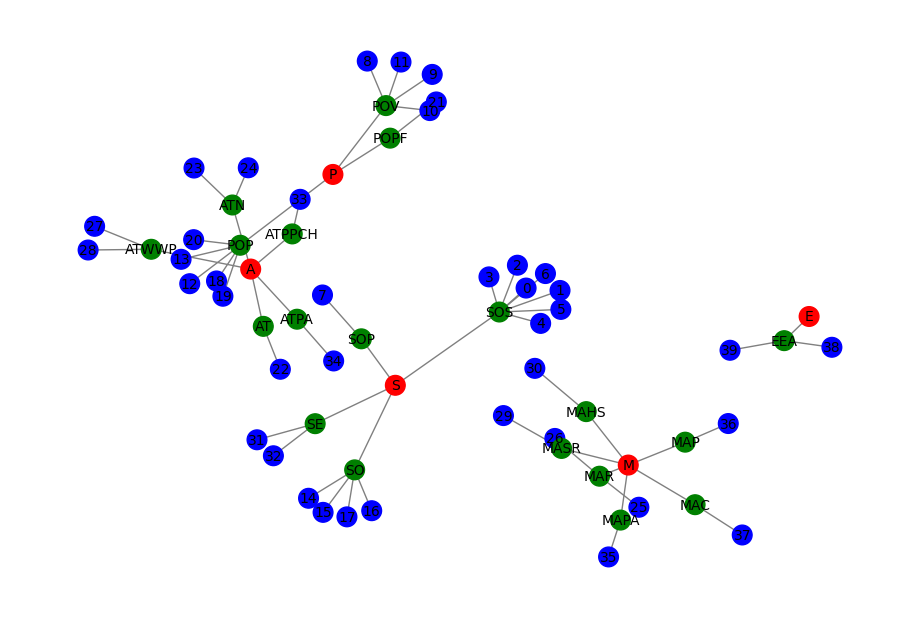

In [100]:
import matplotlib.pyplot as plt

def visualize_graph(G, node_labels=None):
    ## assing colors to nodes
    color_map = []
    for node in G:
        if node in nodes_types_group_subgroup_df['Group'].unique():
            color_map.append('red')
        elif node in nodes_types_group_subgroup_df['Sub-Group'].unique():
            color_map.append('green')
        elif node in nodes_types_plant_storage_df['Plant'].unique():
            color_map.append('yellow')
        elif node in nodes_types_plant_storage_df['Storage Location'].unique():
            color_map.append('purple')
        elif node in nodes_index_df['NodeIndex'].unique():
            color_map.append('blue')
        else:
            print('Couldnt classify color of node:', node)
            color_map.append('black')


    pos = nx.spring_layout(G,k=0.2)  # Position nodes using Fruchterman-Reingold force-directed algorithm
    plt.figure(figsize=(9, 6))
    nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color='gray', node_size=200, font_size=10, cmap=plt.get_cmap('viridis'))
    if node_labels:
        nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')
    plt.show()

visualize_graph(G)

We can now add the Plants and Storages as well.

In [101]:
# Plants
for p in nodes_types_plant_storage_df['Plant'].unique():
    G.add_node(p, name=p)
# Storage
for s in nodes_types_plant_storage_df['Storage Location'].unique():
    G.add_node(s, name=s)
##Plants - Product
for index, row in nodes_types_plant_storage_df.iterrows():
    G.add_edge(row['Plant'], nodes_index_df.loc[nodes_index_df['Node'] == row['Node'], 'NodeIndex'].values[0])
##Storage - Product
for index, row in nodes_types_plant_storage_df.iterrows():
   G.add_edge(row['Storage Location'], nodes_index_df.loc[nodes_index_df['Node'] == row['Node'], 'NodeIndex'].values[0])

Couldnt classify color of node: nan
Couldnt classify color of node: nan


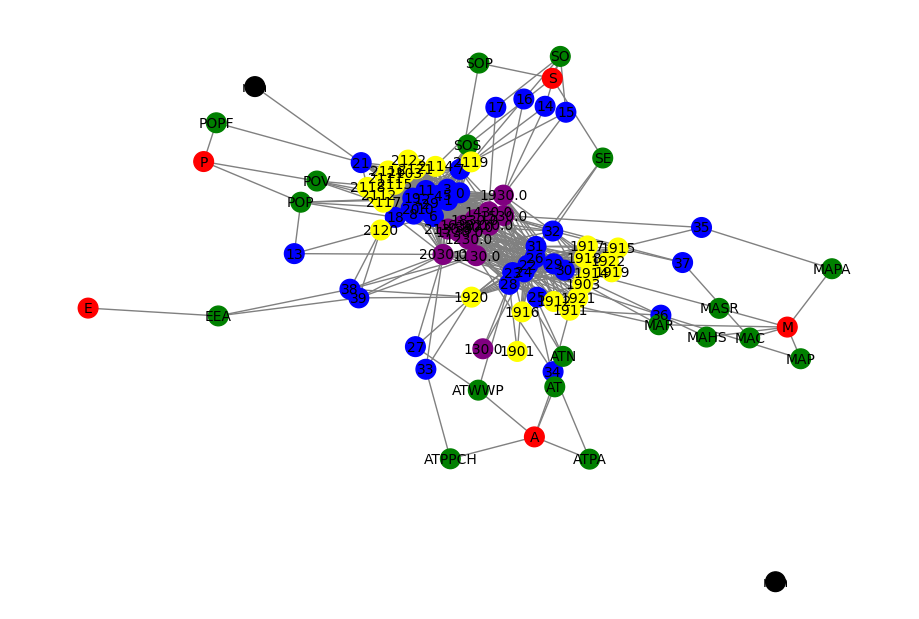

In [102]:
visualize_graph(G)

As we can see, the visualization of the graph becomes more cluttered the more nodes and edges we add. 

## 2.Building the GNN

## 3.Evaluation